In [1]:
import numpy as np
import h5py
import cv2
import glob
import matplotlib.pyplot as plt
import time

reading data of white...
white_LED1.png
white_LED2.png
white_LED3.png
white_LED4.png
white_LED5.png
white_LED6.png
data[i-1].shpae:  (480, 640, 3)
data[i-1].shpae:  (480, 640, 3)
data[i-1].shpae:  (480, 640, 3)
data[i-1].shpae:  (480, 640, 3)
data[i-1].shpae:  (480, 640, 3)
data[i-1].shpae:  (480, 640, 3)


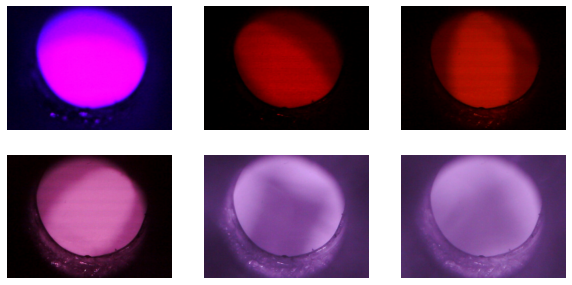

reading data of white sucessful



In [2]:
#read file for .png
def read_while_file():
    print("reading data of white...")
    file_path='../pleurotus_eryngii/white/*LED*.png'
    file_name = glob.glob(file_path)
    file_num = len(file_name)

    data = np.array(file_num*[480*[640*[3*[None]]]])

    for i in range(file_num):
        data[i] = cv2.imread(file_name[i])
        file_name[i] = "white_"+file_name[i][43:]
        # print(data[i].shape)
        print(file_name[i])

    data = data.astype('uint8')
    # print(data[0].shape)

    plt.figure(figsize=(10,5))
    for i in range(1,7):
        plt.subplot(2,3,i)
        plt.axis("off")
        # plt.title(file_name[i-1])
        print("data[i-1].shpae: ",data[i-1].shape)
        plt.imshow(cv2.cvtColor(data[i-1], cv2.COLOR_BGR2RGB))
    plt.show()

    print("reading data of white sucessful\n")
    return data,file_name


white_data, white_Fname = read_while_file()


In [3]:
def temp(data_Gnum,file_name_n):
    #=========================================================
    for group in range(data_Gnum+1):
        for i in range(6):
            print(file_name_n[group][1][i],"\t",end="")
        print('\n')
    #=========================================================


In [4]:
def read_data_file():
    print("reading data....")
    file_path = '../Pleurotus_eryngii/1030/*'
    file_name = glob.glob(file_path)
    group_num = 2 #len(file_name)//
    print("group_num = ", group_num)


    ## group_num/(black&LED)/NumOfPicture/picture(480*640*3)
    data = np.array(group_num*[2*[6*[480*[640*[3*[None]]]]]])
    file_name_n = group_num*[2*[6*[""]]]
    print("data.shpae = ",data.shape)
    print("file_name.shpae = ",np.array(file_name_n).shape)

    for group in range(group_num):
        print("\nprocessing group {} ...".format(group))
        print(file_name_n)

        for black in range(3):
            data[group][0][black] = cv2.imread(file_name[group*9+black])
            file_name_n[group][0][black] = file_name[group*9+black][26:]

        for LED in range(6):
            data[group][1][LED] = cv2.imread(file_name[group*9+3+LED])
            file_name_n[group][1][LED] = file_name[group*9+3+LED][26:]

        for i in range(2):
            for j in range(6):
                print('\t',file_name_n[group][i][j],end="")
            print()
        # temp(group,file_name_n)


    print("\nreading data sucessful\n")
    return data,file_name_n,group_num


#=========================================================
data, data_Fname, data_Gnum = read_data_file()


reading data....
group_num =  2
data.shpae =  (2, 2, 6, 480, 640, 3)
file_name.shpae =  (2, 2, 6)

processing group 0 ...
[[['', '', '', '', '', ''], ['', '', '', '', '', '']], [['', '', '', '', '', ''], ['', '', '', '', '', '']]]
	 20191122_093419_LED1.png	 20191122_093420_LED2.png	 20191122_093420_LED3.png	 20191122_093421_LED4.png	 20191122_093421_LED5.png	 20191122_093422_LED6.png
	 20191122_093419_LED1.png	 20191122_093420_LED2.png	 20191122_093420_LED3.png	 20191122_093421_LED4.png	 20191122_093421_LED5.png	 20191122_093422_LED6.png

processing group 1 ...
[[['20191122_093419_LED1.png', '20191122_093420_LED2.png', '20191122_093420_LED3.png', '20191122_093421_LED4.png', '20191122_093421_LED5.png', '20191122_093422_LED6.png'], ['20191122_093419_LED1.png', '20191122_093420_LED2.png', '20191122_093420_LED3.png', '20191122_093421_LED4.png', '20191122_093421_LED5.png', '20191122_093422_LED6.png']], [['20191122_093419_LED1.png', '20191122_093420_LED2.png', '20191122_093420_LED3.png', '2

In [5]:
## group_num/NumOfPicture(LED)/picture(480*640*3)
reflectivity = np.array(data_Gnum*[6*[480*[640*[3*[None]]]]])
print("reflectivity.shape=", reflectivity.shape)
white_data = white_data.astype('float')
data = data.astype('float')

LED1_white = white_data[0]
LED2_white = white_data[1]
LED3_white = white_data[2]
LED4_white = white_data[3]
LED5_white = white_data[4]
LED6_white = white_data[5]
# print("LED6_white.shape=",LED6_white.shape)

def array_divide(a,b):
    return np.divide(a, b, out=np.zeros_like(a), where=b!=0)

for Gnum in range(data_Gnum):
    LED1 = data[Gnum][1][0]
    LED2 = data[Gnum][1][1]
    LED3 = data[Gnum][1][2]
    LED4 = data[Gnum][1][3]
    LED5 = data[Gnum][1][4]
    LED6 = data[Gnum][1][5]
    # print("LED6.shape=",LED6.shape)

    dark_30 = data[Gnum][0][0]
    dark_40 = data[Gnum][0][1]
    dark_100= data[Gnum][0][2]
    # print("dark_100.shape=",dark_100.shape)

    reflectivity[Gnum][0] = array_divide((LED1-dark_40) , (LED1_white-dark_40))
    reflectivity[Gnum][1] = array_divide((LED2-dark_30) , (LED1_white-dark_30))
    reflectivity[Gnum][2] = array_divide((LED3-dark_30) , (LED1_white-dark_30))
    reflectivity[Gnum][3] = array_divide((LED4-dark_30) , (LED1_white-dark_30))
    reflectivity[Gnum][4] = array_divide((LED5-dark_30) , (LED1_white-dark_30))
    reflectivity[Gnum][5] = array_divide((LED6-dark_100), (LED1_white-dark_100))
    print("processing group {} ...".format(Gnum))
reflectivity = reflectivity.astype('uint8')
print("process sucessful\n")



reflectivity.shape= (2, 6, 480, 640, 3)
processing group 0 ...
processing group 1 ...
process sucessful



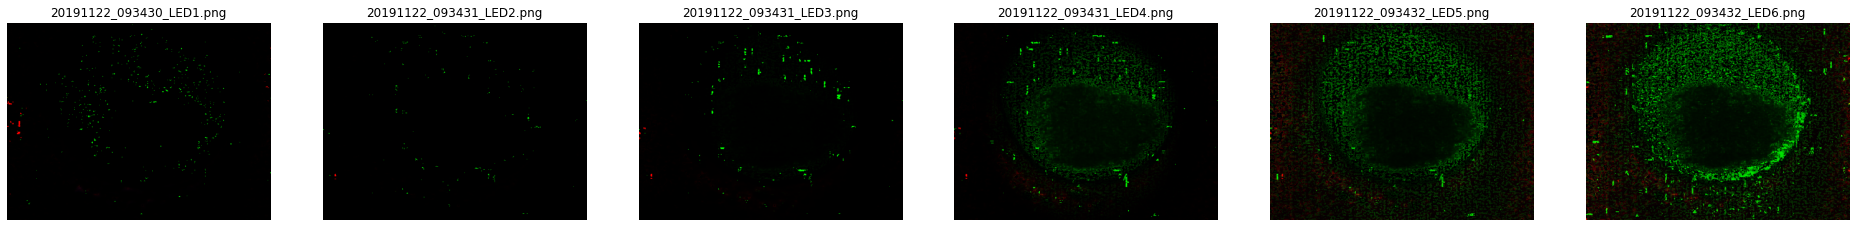

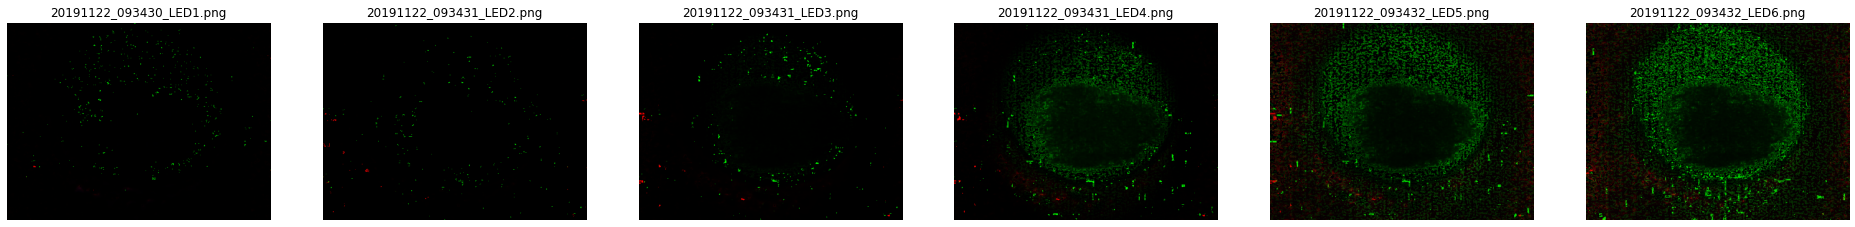

In [6]:
for Gnum in range(data_Gnum):
    plt.figure(figsize=(33,20))
    for i in range(1,7):
        plt.subplot(1,6,i)
        plt.axis("off")
        plt.title(data_Fname[Gnum][1][i-1])
        plt.imshow(cv2.cvtColor(reflectivity[Gnum][i-1], cv2.COLOR_BGR2RGB))
        # print(data_Fname[Gnum][1][i-1])
    plt.show()
